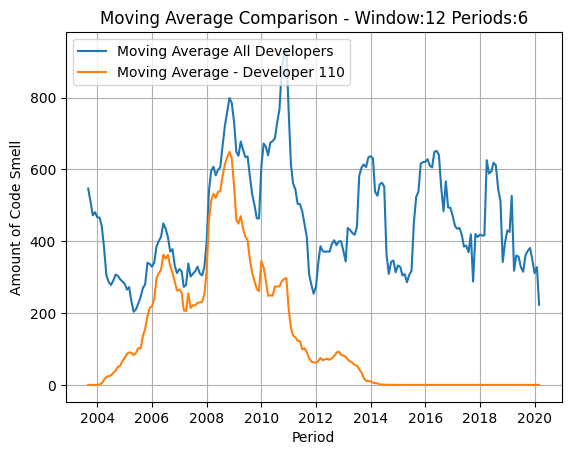

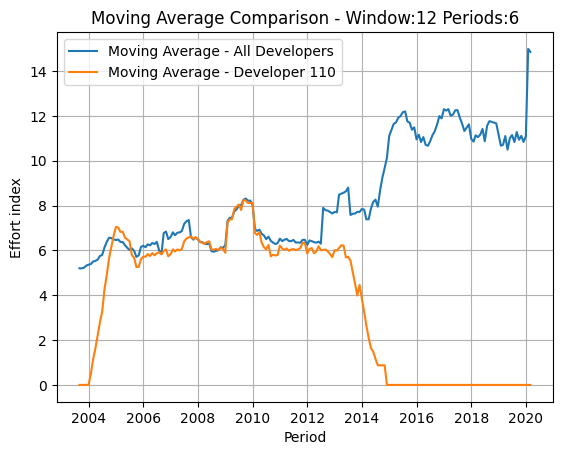

In [1]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt4
from Query import Query
from configuration import Configuration
from IPython.core.display import display
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 0)
%matplotlib inline
conn_ = pyodbc.connect(Configuration.getConfigValue('database_connection'))
query_ = Query.getQuery('developer')
result_ = pd.read_sql_query(query_,conn_)
dataframes = pd.DataFrame(result_)
desenvolvedor =  str( dataframes[['ID_DEVELOPER']].values[0][0])
window =  int( Configuration.getConfigValue('QUESTION4_METRIC1_WINDOW'))
min_periods = int(Configuration.getConfigValue('QUESTION4_METRIC1_MIN_PERIODS'))

def graficoQuantidadeMediaMovel():
    query = Query.getQuery('query_4_1')
    query = query.replace('{desenvolvedor}',desenvolvedor)
    conn = pyodbc.connect(Configuration.getConfigValue('database_connection'))
    result = pd.read_sql_query(query,conn)
    dataFrameData = pd.DataFrame(result, columns=['DATA','TOTAL_ADD_CS_ALL_DEV','TOTAL_ADD_CS_DEV'])
    if len(dataFrameData) == 0 :
        display("No data to analyze")
    else:
        dataFrameData["DATA"] = pd.to_datetime(dataFrameData["DATA"],format="%Y-%m-%d")
        dataFrameData.index = dataFrameData["DATA"]

        dataFrameData['TOTAL_ADD_CS_ALL_DEV'] = dataFrameData.TOTAL_ADD_CS_ALL_DEV
        dataFrameData['TOTAL_ADD_CS_DEV'] = dataFrameData.TOTAL_ADD_CS_DEV
        dataFrameData['SMA_1_TOTAL_ADD_CS_ALL_DEV'] = dataFrameData.TOTAL_ADD_CS_ALL_DEV.rolling(window, min_periods=min_periods).mean()
        dataFrameData['SMA_1_TOTAL_ADD_CS_DEV'] = dataFrameData.TOTAL_ADD_CS_DEV.rolling(window, min_periods=min_periods).mean()

        plt1.grid(True)

        plt1.plot(dataFrameData['SMA_1_TOTAL_ADD_CS_ALL_DEV'],label='Moving Average All Developers')
        plt1.plot(dataFrameData['SMA_1_TOTAL_ADD_CS_DEV'],label='Moving Average - Developer {0}'.format(desenvolvedor))


        plt1.title('Moving Average Comparison - Window:{0} Periods:{1}'.format(window,min_periods))
        plt1.xlabel('Period')
        plt1.ylabel('Amount of Code Smell')
        plt1.legend(loc=2)
        plt1.show()
        #display(dataFrameData)

def graficoIndice():
    query = Query.getQuery('query_4_1_B')
    query = query.replace('{desenvolvedor}',desenvolvedor)
    conn = pyodbc.connect(Configuration.getConfigValue('database_connection'))
    result = pd.read_sql_query(query,conn)

    dataFrameDataIndice = pd.DataFrame(result,columns=['DATA','INDICE_GERAL','INDICE_DEV'])
    if len(dataFrameDataIndice) == 0 :
        display("Não há dados para analisar")
    else:
        dataFrameDataIndice["DATA"] = pd.to_datetime(dataFrameDataIndice["DATA"],format="%Y-%m-%d")
        dataFrameDataIndice.index = dataFrameDataIndice["DATA"]
        dataFrameDataIndice['INDICE_GERAL'] = dataFrameDataIndice.INDICE_GERAL
        dataFrameDataIndice['INDICE_DEV'] = dataFrameDataIndice.INDICE_DEV
        dataFrameDataIndice['SMA_1_INDICE_GERAL'] = dataFrameDataIndice.INDICE_GERAL.rolling(window, min_periods=min_periods).mean()
        dataFrameDataIndice['SMA_1_INDICE_DEV'] = dataFrameDataIndice.INDICE_DEV.rolling(window, min_periods=min_periods).mean()

        plt4.grid(True)

        plt4.plot(dataFrameDataIndice['SMA_1_INDICE_GERAL'],label='Moving Average - All Developers')
        plt4.plot(dataFrameDataIndice['SMA_1_INDICE_DEV'],label='Moving Average - Developer {0}'.format(desenvolvedor))

        plt4.title('Moving Average Comparison - Window:{0} Periods:{1}'.format(window,min_periods))
        plt4.xlabel('Period')
        plt4.ylabel('Effort index')
        plt4.legend(loc=2)
        plt4.show()


graficoQuantidadeMediaMovel()
graficoIndice()